In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from cross_val_tool import cross_validation
from time import time
import matplotlib.pyplot as plt
from collections import defaultdict
import seaborn as sns

%matplotlib inline

# Looking at First Order Purchases Only 

In [2]:
first_order_raw = pd.read_csv('/Users/keatoncarano/Desktop/dsi-sf-7-materials-Keaton/Capstone/order_id_first_orders.csv')

In [3]:
first_order_raw.head()

,Mr Order Order ID,User Order Facts First Order Type,Mr User User ID,Mr User Age Tier,Mr Order Items Product Code,User Order Facts Color Kit First (Yes / No),Mr Order First Order (Yes / No),User Order Facts Lifetime Orders,User Order Facts Total Lifetime Orders
0,101251941,one-time,1012844.0,18 to 24,5NRM,Yes,Yes,8,8
1,101244767,one-time,1006001.0,18 to 24,5NRM,Yes,Yes,2,2
2,101244767,one-time,1006001.0,18 to 24,$5NRM,Yes,Yes,2,2
3,101234777,one-time,997724.0,18 to 24,5RV,Yes,Yes,2,2
4,101192188,subscription,967744.0,18 to 24,$4NMG,Yes,Yes,1,1


In [4]:
first_order_raw.shape
first_order_raw['Mr User Age Tier'].value_counts()

Undefined      203263
45 to 54         2157
55 to 64         1520
35 to 44         1075
25 to 34          494
65 or Above       488
18 to 24           98
Name: Mr User Age Tier, dtype: int64

In [5]:
first_order_raw.isnull().sum()

Mr Order Order ID                              0
User Order Facts First Order Type              0
Mr User User ID                                2
Mr User Age Tier                               0
Mr Order Items Product Code                    0
User Order Facts Color Kit First (Yes / No)    0
Mr Order First Order (Yes / No)                0
User Order Facts Lifetime Orders               0
User Order Facts Total Lifetime Orders         0
dtype: int64

In [6]:
order = first_order_raw.groupby(['Mr User User ID'])['Mr Order Items Product Code'].agg(lambda x: x.tolist())


In [7]:
first_order = order.reset_index()

In [8]:
first_order.head()

,Mr User User ID,0
0,2796.0,[9NGV]
1,3558.0,[5NGV]
2,7880.0,"[9NA, $9NA]"
3,26990.0,[5NRM]
4,32199.0,[4NMG]


In [9]:
first_order.columns=['Mr User User ID', 'Product(s) Purchased']

In [10]:
clean_first_orders = first_order_raw.drop_duplicates(subset=['Mr User User ID'])
clean_first_orders['Mr User Age Tier'].value_counts()

Undefined      133951
45 to 54         1280
55 to 64          961
35 to 44          660
65 or Above       322
25 to 34          311
18 to 24           62
Name: Mr User Age Tier, dtype: int64

In [11]:
first_order = first_order.merge(clean_first_orders, on='Mr User User ID')




In [12]:
first_order.head()

,Mr User User ID,Product(s) Purchased,Mr Order Order ID,User Order Facts First Order Type,Mr User Age Tier,Mr Order Items Product Code,User Order Facts Color Kit First (Yes / No),Mr Order First Order (Yes / No),User Order Facts Lifetime Orders,User Order Facts Total Lifetime Orders
0,2796.0,[9NGV],100900090,one-time,Undefined,9NGV,Yes,Yes,1,1
1,3558.0,[5NGV],100637272,subscription,Undefined,5NGV,Yes,Yes,1,1
2,7880.0,"[9NA, $9NA]",100605469,one-time,Undefined,9NA,Yes,Yes,7,7
3,26990.0,[5NRM],100838508,one-time,Undefined,5NRM,Yes,Yes,2,2
4,32199.0,[4NMG],100416063,subscription,Undefined,4NMG,Yes,Yes,7,7


In [13]:
first_order['Mr Order First Order (Yes / No)'].value_counts()

Yes    137546
Name: Mr Order First Order (Yes / No), dtype: int64

In [14]:
first_order['User Order Facts First Order Type'].value_counts()

one-time        88213
subscription    49333
Name: User Order Facts First Order Type, dtype: int64

In [15]:
first_order.drop(['Mr Order Items Product Code'],axis=1,inplace=True)

In [16]:
first_order['Num Items Purchased'] = first_order['Product(s) Purchased'].str.len()


In [17]:
first_order['Purchased Accessory Kit'] = first_order['Product(s) Purchased'].apply(lambda x: 1 if '41000' in x else 0)
first_order.head(10)

,Mr User User ID,Product(s) Purchased,Mr Order Order ID,User Order Facts First Order Type,Mr User Age Tier,User Order Facts Color Kit First (Yes / No),Mr Order First Order (Yes / No),User Order Facts Lifetime Orders,User Order Facts Total Lifetime Orders,Num Items Purchased,Purchased Accessory Kit
0,2796.0,[9NGV],100900090,one-time,Undefined,Yes,Yes,1,1,1,0
1,3558.0,[5NGV],100637272,subscription,Undefined,Yes,Yes,1,1,1,0
2,7880.0,"[9NA, $9NA]",100605469,one-time,Undefined,Yes,Yes,7,7,2,0
3,26990.0,[5NRM],100838508,one-time,Undefined,Yes,Yes,2,2,1,0
4,32199.0,[4NMG],100416063,subscription,Undefined,Yes,Yes,7,7,1,0
5,36995.0,[6NGV],100627043,one-time,Undefined,Yes,Yes,2,2,1,0
6,72523.0,[9NG],100352809,one-time,Undefined,Yes,Yes,6,6,1,0
7,75776.0,[5NGV],100632681,one-time,Undefined,Yes,Yes,4,4,1,0
8,76208.0,"[CRG7GM, 6NMG]",100841416,one-time,Undefined,Yes,Yes,2,2,2,0
9,86140.0,"[5NGV, 41000]",101084661,subscription,Undefined,Yes,Yes,11,11,2,1


In [18]:
first_order.shape

(137546, 11)

In [19]:
#first_order.drop_duplicates(inplace=True)

In [20]:
first_order =  pd.get_dummies(data=first_order, columns=['User Order Facts First Order Type', 'Mr User Age Tier'])

In [21]:
first_order.drop(['User Order Facts First Order Type_one-time','User Order Facts Total Lifetime Orders','User Order Facts Color Kit First (Yes / No)','Mr Order First Order (Yes / No)'], axis=1, inplace=True)

In [22]:
first_order.shape

(137546, 14)

In [23]:
first_order.head()

,Mr User User ID,Product(s) Purchased,Mr Order Order ID,User Order Facts Lifetime Orders,Num Items Purchased,Purchased Accessory Kit,User Order Facts First Order Type_subscription,Mr User Age Tier_18 to 24,Mr User Age Tier_25 to 34,Mr User Age Tier_35 to 44,Mr User Age Tier_45 to 54,Mr User Age Tier_55 to 64,Mr User Age Tier_65 or Above,Mr User Age Tier_Undefined
0,2796.0,[9NGV],100900090,1,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,3558.0,[5NGV],100637272,1,1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,7880.0,"[9NA, $9NA]",100605469,7,2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,26990.0,[5NRM],100838508,2,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,32199.0,[4NMG],100416063,7,1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


# Look at Quiz Responsess for All Orders

In [24]:
quiz_by_order = pd.read_csv('/Users/keatoncarano/Desktop/dsi-sf-7-materials-Keaton/Capstone/QuizResults.csv')

/Users/keatoncarano/anaconda/envs/dsi/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (25,26,27,28,29,30,31,32) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [25]:
quiz_by_order.shape

(1646037, 33)

In [26]:
# eliminate rows with no rec
quiz_by_order = quiz_by_order[quiz_by_order['Event Facts Recommendation 1'].notnull()]
quiz_by_order.shape

(419023, 33)

In [27]:
quiz_by_order.fillna(0,inplace=True)

In [28]:
non_dum_cols_ond = ['Mr Order Order ID','Mr Order Items Product Code','Mr User User ID','Quiz Responses Color Differntial','Quiz Responses Color Frequency','Quiz Responses Natural Hair Level','Quiz Responses Treated Hair Level','Event Facts Recommendation 1','Event Facts Recommendation 2','Event Facts Recommendation 3','Event Facts Recommendation 4','Event Facts Recommendation 5','Event Facts Recommendation 6','Event Facts Recommendation 7','Event Facts Recommendation 8']

In [29]:
quiz_by_order.head()

,Mr Order Order ID,Mr User User ID,Mr Order Items Product Code,Quiz Responses Hair Tone,Quiz Responses Color Differntial,Quiz Responses Color Family,Quiz Responses Color Frequency,Quiz Responses Color Resistance,Quiz Responses Color Treated,Quiz Responses Covering Grey,...,Quiz Responses What Are You Looking to Do,Quiz Responses Final Advisor Profile,Event Facts Recommendation 1,Event Facts Recommendation 2,Event Facts Recommendation 3,Event Facts Recommendation 4,Event Facts Recommendation 5,Event Facts Recommendation 6,Event Facts Recommendation 7,Event Facts Recommendation 8
193425,100679661,315645.0,6NAV,mahogany,0.0,brown,4.0,normal,Yes,Yes,...,0,0,6.5NNN,6NMG,6NAC,6NGV,6NAV,6NCG,6NRR,0
203042,100687782,416345.0,5NGM,mahogany,0.0,brown,8.0,0,Yes,Yes,...,0,0,5NGM,5NAC,5NA,5NGV,5NRM,5.5NNN,0,0
203043,100687782,416345.0,5NGM,mahogany,0.0,brown,8.0,0,Yes,Yes,...,0,0,5NRM,5NAC,5NA,5NGV,5NGM,5.5NNN,0,0
286089,100758353,593514.0,$4NA,ash,0.0,blonde,0.0,resistant,No,Yes,...,change,Profile B - Blonde High Gray,4NA,4NGV,4NMG,0,0,0,0,0
286092,100758353,593514.0,CRG6NA,ash,0.0,blonde,0.0,resistant,No,Yes,...,change,Profile B - Blonde High Gray,4NA,4NGV,4NMG,0,0,0,0,0


In [30]:
joined_no_dum_quiz = first_order.merge(quiz_by_order, on='Mr Order Order ID', how='left')

In [31]:
order_count = quiz_by_order['Quiz Responses Color Family'].value_counts().to_dict()

ond_count = joined_no_dum_quiz[joined_no_dum_quiz['User Order Facts Lifetime Orders']==1]['Quiz Responses Color Family'].value_counts().to_dict()

In [32]:
#rec_purchased = pd.DataFrame.from_dict([otb_rec_purchased, notb_rec_purchased])


color = pd.DataFrame.from_dict([order_count,ond_count])

In [33]:
color.head()

,0,black,blonde,brown,red
0,1053,36518,71358,263629,46465
1,184,4796,10912,31030,4702


In [34]:
color.iloc[1,:]/color.iloc[0,:]

0         0.174739
black     0.131332
blonde    0.152919
brown     0.117703
red       0.101194
dtype: float64

we see that blondes seeem to have a higher rate than brunettes for being one and done customers. Black has the second highest rate. this makes somewhat logical sense because according to Madison Reed, they often have trouble creating products that create drastic color changes. Blonds and Black haired women are on the extreme ends of hair coloring and the results may not be as dramatic as the user wished

In [35]:
dum_cols = []
for col in quiz_by_order.columns:
    if col not in non_dum_cols_ond:
        dum_cols.append(col)

In [36]:
quiz_by_order = pd.get_dummies(data=quiz_by_order, columns=dum_cols)

In [37]:
quiz_by_order.shape

(419023, 99)

In [38]:
quiz_by_order = quiz_by_order.drop_duplicates(subset=['Mr Order Order ID'])


In [39]:
quiz_by_order['Quiz Responses Color Differntial'].value_counts()

 0.0    134454
 1.0     34484
-1.0     18692
 2.0     16189
 3.0      8209
-2.0      4726
 4.0      3276
-3.0      1508
 5.0       820
-4.0       537
 6.0       226
-5.0       153
 7.0        89
-6.0        77
 8.0        17
-7.0        16
-8.0         1
Name: Quiz Responses Color Differntial, dtype: int64

In [40]:
joined = first_order.merge(quiz_by_order, on='Mr Order Order ID', how='left')
joined.shape

(137546, 112)

In [41]:
# eliminate rows with no rec again
joined = joined[joined['Event Facts Recommendation 1'].notnull()]

In [42]:
joined.head()

,Mr User User ID_x,Product(s) Purchased,Mr Order Order ID,User Order Facts Lifetime Orders,Num Items Purchased,Purchased Accessory Kit,User Order Facts First Order Type_subscription,Mr User Age Tier_18 to 24,Mr User Age Tier_25 to 34,Mr User Age Tier_35 to 44,...,Quiz Responses What Are You Looking to Do_not_sure,Quiz Responses What Are You Looking to Do_touch_up,Quiz Responses Final Advisor Profile_0,Quiz Responses Final Advisor Profile_Profile A - Blonde Low Gray,Quiz Responses Final Advisor Profile_Profile B - Blonde High Gray,Quiz Responses Final Advisor Profile_Profile D Brunette Low Gray,Quiz Responses Final Advisor Profile_Profile E Brunette High Gray,Quiz Responses Final Advisor Profile_Profile F Brunette Go Darker,Quiz Responses Final Advisor Profile_Profile G Warm Brunette,Quiz Responses Final Advisor Profile_Profile J Brunette Resistant High Gray
0,2796.0,[9NGV],100900090,1,1,0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,26990.0,[5NRM],100838508,2,1,0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,76208.0,"[CRG7GM, 6NMG]",100841416,2,2,0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,86140.0,"[5NGV, 41000]",101084661,11,2,1,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13,132208.0,"[2NAA, 41000, cclegno]",100928525,9,3,1,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [43]:
# was for when analysis was done on product level
# exclude_purchased_rows = joined['Mr Order Items Product Code_x'].str.contains('^cc')
# joined = joined[~exclude_purchased_rows]

In [44]:
joined.shape

(65585, 112)

In [45]:
joined.drop(['Mr User User ID_y','Mr Order Items Product Code'],axis=1, inplace=True)

In [46]:
def check_recs(x):
    x = x.values.tolist()
    pur_set = x[0]
    rec_set = x[1:]
    #rec_set = set(rec_set)
    #if any([item for item in pur_set if item in rec_set]):
    return any([item for item in pur_set if item in rec_set])

In [47]:
rec_colums_1 = ['Product(s) Purchased','Event Facts Recommendation 1']
rec_colums_2 = ['Product(s) Purchased','Event Facts Recommendation 1','Event Facts Recommendation 2']
rec_colums_3 = ['Product(s) Purchased','Event Facts Recommendation 1','Event Facts Recommendation 2','Event Facts Recommendation 3']
rec_colums_4 = ['Product(s) Purchased','Event Facts Recommendation 1','Event Facts Recommendation 2','Event Facts Recommendation 3','Event Facts Recommendation 4']
rec_colums_5 = ['Product(s) Purchased','Event Facts Recommendation 1','Event Facts Recommendation 2','Event Facts Recommendation 3','Event Facts Recommendation 4','Event Facts Recommendation 5']
rec_colums_6 = ['Product(s) Purchased','Event Facts Recommendation 1','Event Facts Recommendation 2','Event Facts Recommendation 3','Event Facts Recommendation 4','Event Facts Recommendation 5','Event Facts Recommendation 6']
rec_colums_7 = ['Product(s) Purchased','Event Facts Recommendation 1','Event Facts Recommendation 2','Event Facts Recommendation 3','Event Facts Recommendation 4','Event Facts Recommendation 5','Event Facts Recommendation 6','Event Facts Recommendation 7']
rec_colums_8 = ['Product(s) Purchased','Event Facts Recommendation 1','Event Facts Recommendation 2','Event Facts Recommendation 3','Event Facts Recommendation 4','Event Facts Recommendation 5','Event Facts Recommendation 6','Event Facts Recommendation 7','Event Facts Recommendation 8']

In [48]:
rec_colum_1 = ['Product(s) Purchased','Event Facts Recommendation 1']
rec_colum_2 = ['Product(s) Purchased','Event Facts Recommendation 2']
rec_colum_3 = ['Product(s) Purchased','Event Facts Recommendation 3']
rec_colum_4 = ['Product(s) Purchased','Event Facts Recommendation 4']
rec_colum_5 = ['Product(s) Purchased','Event Facts Recommendation 5']
rec_colum_6 = ['Product(s) Purchased','Event Facts Recommendation 6']
rec_colum_7 = ['Product(s) Purchased','Event Facts Recommendation 7']
rec_colum_8 = ['Product(s) Purchased','Event Facts Recommendation 8']

In [49]:
joined[rec_colums_1].iloc[0:10].apply(check_recs, axis = 1)

0       False
3       False
8       False
9       False
13      False
23      False
47       True
685     False
1135    False
1516    False
dtype: bool

In [50]:
joined.head()

,Mr User User ID_x,Product(s) Purchased,Mr Order Order ID,User Order Facts Lifetime Orders,Num Items Purchased,Purchased Accessory Kit,User Order Facts First Order Type_subscription,Mr User Age Tier_18 to 24,Mr User Age Tier_25 to 34,Mr User Age Tier_35 to 44,...,Quiz Responses What Are You Looking to Do_not_sure,Quiz Responses What Are You Looking to Do_touch_up,Quiz Responses Final Advisor Profile_0,Quiz Responses Final Advisor Profile_Profile A - Blonde Low Gray,Quiz Responses Final Advisor Profile_Profile B - Blonde High Gray,Quiz Responses Final Advisor Profile_Profile D Brunette Low Gray,Quiz Responses Final Advisor Profile_Profile E Brunette High Gray,Quiz Responses Final Advisor Profile_Profile F Brunette Go Darker,Quiz Responses Final Advisor Profile_Profile G Warm Brunette,Quiz Responses Final Advisor Profile_Profile J Brunette Resistant High Gray
0,2796.0,[9NGV],100900090,1,1,0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,26990.0,[5NRM],100838508,2,1,0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,76208.0,"[CRG7GM, 6NMG]",100841416,2,2,0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,86140.0,"[5NGV, 41000]",101084661,11,2,1,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13,132208.0,"[2NAA, 41000, cclegno]",100928525,9,3,1,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


0.518304490356
0.659159868872
0.731478234352
0.773728748952
0.798322787223
0.812045437219
0.816833117329
0.820187542883


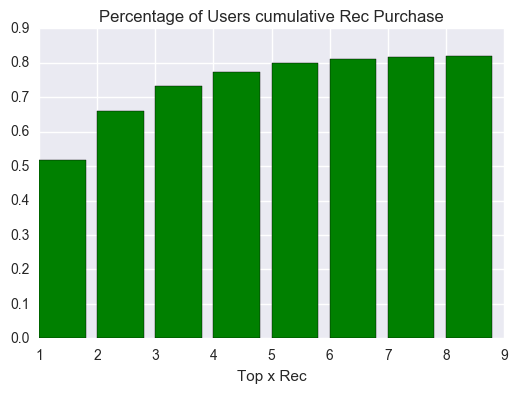

<Container object of 8 artists>

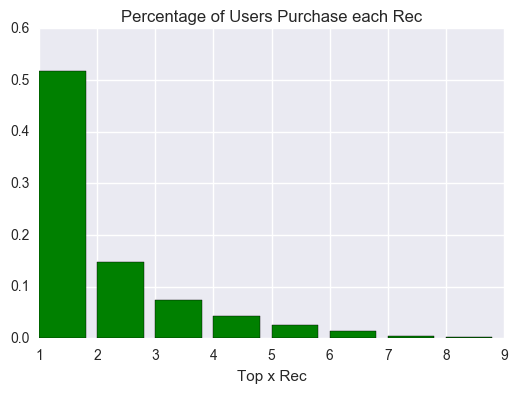

In [51]:
joined['Bought_top_1_Rec'] = joined[rec_colums_1].apply(check_recs, axis = 1)
joined['Bought_top_2_Rec'] = joined[rec_colums_2].apply(check_recs, axis = 1)
joined['Bought_top_3_Rec'] = joined[rec_colums_3].apply(check_recs, axis = 1)
joined['Bought_top_4_Rec'] = joined[rec_colums_4].apply(check_recs, axis = 1)
joined['Bought_top_5_Rec'] = joined[rec_colums_5].apply(check_recs, axis = 1)
joined['Bought_top_6_Rec'] = joined[rec_colums_6].apply(check_recs, axis = 1)
joined['Bought_top_7_Rec'] = joined[rec_colums_7].apply(check_recs, axis = 1)
joined['Bought_top_8_Rec'] = joined[rec_colums_8].apply(check_recs, axis = 1)

joined['Bought_Rec_1'] = joined[rec_colum_1].apply(check_recs, axis = 1)
joined['Bought_Rec_2'] = joined[rec_colum_2].apply(check_recs, axis = 1)
joined['Bought_Rec_3'] = joined[rec_colum_3].apply(check_recs, axis = 1)
joined['Bought_Rec_4'] = joined[rec_colum_4].apply(check_recs, axis = 1)
joined['Bought_Rec_5'] = joined[rec_colum_5].apply(check_recs, axis = 1)
joined['Bought_Rec_6'] = joined[rec_colum_6].apply(check_recs, axis = 1)
joined['Bought_Rec_7'] = joined[rec_colum_7].apply(check_recs, axis = 1)
joined['Bought_Rec_8'] = joined[rec_colum_8].apply(check_recs, axis = 1)

avg_buy_top_1 = joined['Bought_top_1_Rec'].mean()
avg_buy_top_2 = joined['Bought_top_2_Rec'].mean()
avg_buy_top_3 = joined['Bought_top_3_Rec'].mean()
avg_buy_top_4 = joined['Bought_top_4_Rec'].mean()
avg_buy_top_5 = joined['Bought_top_5_Rec'].mean()
avg_buy_top_6 = joined['Bought_top_6_Rec'].mean()
avg_buy_top_7 = joined['Bought_top_7_Rec'].mean()
avg_buy_top_8 = joined['Bought_top_8_Rec'].mean()

avg_buy_1 = joined['Bought_Rec_1'].mean()
avg_buy_2 = joined['Bought_Rec_2'].mean()
avg_buy_3 = joined['Bought_Rec_3'].mean()
avg_buy_4 = joined['Bought_Rec_4'].mean()
avg_buy_5 = joined['Bought_Rec_5'].mean()
avg_buy_6 = joined['Bought_Rec_6'].mean()
avg_buy_7 = joined['Bought_Rec_7'].mean()
avg_buy_8 = joined['Bought_Rec_8'].mean()

top_rec_purchased = {}
top_rec_purchased['1'] = avg_buy_top_1
top_rec_purchased['2'] = avg_buy_top_2
top_rec_purchased['3'] = avg_buy_top_3
top_rec_purchased['4'] = avg_buy_top_4
top_rec_purchased['5'] = avg_buy_top_5
top_rec_purchased['6'] = avg_buy_top_6
top_rec_purchased['7'] = avg_buy_top_7
top_rec_purchased['8'] = avg_buy_top_8

rec_purchased = {}
rec_purchased['1'] = avg_buy_1
rec_purchased['2'] = avg_buy_2
rec_purchased['3'] = avg_buy_3
rec_purchased['4'] = avg_buy_4
rec_purchased['5'] = avg_buy_5
rec_purchased['6'] = avg_buy_6
rec_purchased['7'] = avg_buy_7
rec_purchased['8'] = avg_buy_8

print avg_buy_top_1
print avg_buy_top_2
print avg_buy_top_3
print avg_buy_top_4
print avg_buy_top_5
print avg_buy_top_6
print avg_buy_top_7
print avg_buy_top_8

plt.title('Percentage of Users cumulative Rec Purchase')
plt.xlabel('Top x Rec')
plt.bar(top_rec_purchased.keys(), top_rec_purchased.values(), color='g')
plt.show()

plt.title('Percentage of Users Purchase each Rec')
plt.xlabel('Top x Rec')
plt.bar(rec_purchased.keys(),rec_purchased.values(), color='g')

The first graph above shows the percent of users who bought at least one of their to X Recs

The second graph shows the percent of Users who bought each individual rec (Some orders have more than one item purchased)

In [52]:
joined.head()

,Mr User User ID_x,Product(s) Purchased,Mr Order Order ID,User Order Facts Lifetime Orders,Num Items Purchased,Purchased Accessory Kit,User Order Facts First Order Type_subscription,Mr User Age Tier_18 to 24,Mr User Age Tier_25 to 34,Mr User Age Tier_35 to 44,...,Bought_top_7_Rec,Bought_top_8_Rec,Bought_Rec_1,Bought_Rec_2,Bought_Rec_3,Bought_Rec_4,Bought_Rec_5,Bought_Rec_6,Bought_Rec_7,Bought_Rec_8
0,2796.0,[9NGV],100900090,1,1,0,0.0,0.0,0.0,0.0,...,True,True,False,False,True,False,False,False,False,False
3,26990.0,[5NRM],100838508,2,1,0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False
8,76208.0,"[CRG7GM, 6NMG]",100841416,2,2,0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False
9,86140.0,"[5NGV, 41000]",101084661,11,2,1,1.0,0.0,0.0,0.0,...,True,True,False,False,True,False,False,False,False,False
13,132208.0,"[2NAA, 41000, cclegno]",100928525,9,3,1,1.0,0.0,0.0,0.0,...,True,True,False,False,True,False,False,False,False,False


# One TIme Buyer

In [53]:
joined['one_time_buyer'] = joined['User Order Facts Lifetime Orders'].apply(lambda x: 1 if x ==1 else 0 )

joined['one_time_buyer'].mean()

0.39699626438972324

In [54]:
one_time_buy = joined[joined['one_time_buyer'] == 1]

otb_avg_buy_top_1 = one_time_buy['Bought_top_1_Rec'].mean()
otb_avg_buy_top_2 = one_time_buy['Bought_top_2_Rec'].mean()
otb_avg_buy_top_3 = one_time_buy['Bought_top_3_Rec'].mean()
otb_avg_buy_top_4 = one_time_buy['Bought_top_4_Rec'].mean()
otb_avg_buy_top_5 = one_time_buy['Bought_top_5_Rec'].mean()
otb_avg_buy_top_6 = one_time_buy['Bought_top_6_Rec'].mean()
otb_avg_buy_top_7 = one_time_buy['Bought_top_7_Rec'].mean()
otb_avg_buy_top_8 = one_time_buy['Bought_top_8_Rec'].mean()

otb_top_rec_purchased = {}
otb_top_rec_purchased['1'] = otb_avg_buy_top_1
otb_top_rec_purchased['2'] = otb_avg_buy_top_2
otb_top_rec_purchased['3'] = otb_avg_buy_top_3
otb_top_rec_purchased['4'] = otb_avg_buy_top_4
otb_top_rec_purchased['5'] = otb_avg_buy_top_5
otb_top_rec_purchased['6'] = otb_avg_buy_top_6
otb_top_rec_purchased['7'] = otb_avg_buy_top_7
otb_top_rec_purchased['8'] = otb_avg_buy_top_8

# Non One Time Buyers

In [55]:
none_time_buy = joined[joined['one_time_buyer'] != 1]

notb_avg_buy_top_1 = none_time_buy['Bought_top_1_Rec'].mean()
notb_avg_buy_top_2 = none_time_buy['Bought_top_2_Rec'].mean()
notb_avg_buy_top_3 = none_time_buy['Bought_top_3_Rec'].mean()
notb_avg_buy_top_4 = none_time_buy['Bought_top_4_Rec'].mean()
notb_avg_buy_top_5 = none_time_buy['Bought_top_5_Rec'].mean()
notb_avg_buy_top_6 = none_time_buy['Bought_top_6_Rec'].mean()
notb_avg_buy_top_7 = none_time_buy['Bought_top_7_Rec'].mean()
notb_avg_buy_top_8 = none_time_buy['Bought_top_8_Rec'].mean()

notb_top_rec_purchased = {}
notb_top_rec_purchased['1'] = notb_avg_buy_top_1
notb_top_rec_purchased['2'] = notb_avg_buy_top_2
notb_top_rec_purchased['3'] = notb_avg_buy_top_3
notb_top_rec_purchased['4'] = notb_avg_buy_top_4
notb_top_rec_purchased['5'] = notb_avg_buy_top_5
notb_top_rec_purchased['6'] = notb_avg_buy_top_6
notb_top_rec_purchased['7'] = notb_avg_buy_top_7
notb_top_rec_purchased['8'] = notb_avg_buy_top_8

In [56]:
top_rec_purchased = pd.DataFrame.from_dict([otb_top_rec_purchased, notb_top_rec_purchased])
top_rec_purchased.head()


,1,2,3,4,5,6,7,8
0,0.521681,0.659101,0.728041,0.769789,0.792872,0.805738,0.810347,0.814034
1,0.516082,0.659199,0.733741,0.776322,0.801912,0.816198,0.821103,0.824239


# Purchase per Rec OTB

In [57]:
otb_avg_buy_1 = one_time_buy['Bought_Rec_1'].mean()
otb_avg_buy_2 = one_time_buy['Bought_Rec_2'].mean()
otb_avg_buy_3 = one_time_buy['Bought_Rec_3'].mean()
otb_avg_buy_4 = one_time_buy['Bought_Rec_4'].mean()
otb_avg_buy_5 = one_time_buy['Bought_Rec_5'].mean()
otb_avg_buy_6 = one_time_buy['Bought_Rec_6'].mean()
otb_avg_buy_7 = one_time_buy['Bought_Rec_7'].mean()
otb_avg_buy_8 = one_time_buy['Bought_Rec_8'].mean()

otb_rec_purchased = {}
otb_rec_purchased['1'] = otb_avg_buy_1
otb_rec_purchased['2'] = otb_avg_buy_2
otb_rec_purchased['3'] = otb_avg_buy_3
otb_rec_purchased['4'] = otb_avg_buy_4
otb_rec_purchased['5'] = otb_avg_buy_5
otb_rec_purchased['6'] = otb_avg_buy_6
otb_rec_purchased['7'] = otb_avg_buy_7
otb_rec_purchased['8'] = otb_avg_buy_8

# Purchas per Rec Non OTB

In [58]:
notb_avg_buy_1 = none_time_buy['Bought_Rec_1'].mean()
notb_avg_buy_2 = none_time_buy['Bought_Rec_2'].mean()
notb_avg_buy_3 = none_time_buy['Bought_Rec_3'].mean()
notb_avg_buy_4 = none_time_buy['Bought_Rec_4'].mean()
notb_avg_buy_5 = none_time_buy['Bought_Rec_5'].mean()
notb_avg_buy_6 = none_time_buy['Bought_Rec_6'].mean()
notb_avg_buy_7 = none_time_buy['Bought_Rec_7'].mean()
notb_avg_buy_8 = none_time_buy['Bought_Rec_8'].mean()

notb_rec_purchased = {}
notb_rec_purchased['1'] = notb_avg_buy_1
notb_rec_purchased['2'] = notb_avg_buy_2
notb_rec_purchased['3'] = notb_avg_buy_3
notb_rec_purchased['4'] = notb_avg_buy_4
notb_rec_purchased['5'] = notb_avg_buy_5
notb_rec_purchased['6'] = notb_avg_buy_6
notb_rec_purchased['7'] = notb_avg_buy_7
notb_rec_purchased['8'] = notb_avg_buy_8

In [59]:
rec_purchased = pd.DataFrame.from_dict([otb_rec_purchased, notb_rec_purchased])
rec_purchased.head()



,1,2,3,4,5,6,7,8
0,0.521681,0.145562,0.071706,0.042401,0.023697,0.013020,0.004762,0.003802
1,0.516082,0.147719,0.076059,0.043239,0.025842,0.014514,0.004956,0.003237


# Subscribe OTB

In [60]:
sub_one_time_buy = one_time_buy[one_time_buy['User Order Facts First Order Type_subscription'] == 1]

sub_otb_avg_buy_top_1 = sub_one_time_buy['Bought_top_1_Rec'].mean()
sub_otb_avg_buy_top_2 = sub_one_time_buy['Bought_top_2_Rec'].mean()
sub_otb_avg_buy_top_3 = sub_one_time_buy['Bought_top_3_Rec'].mean()
sub_otb_avg_buy_top_4 = sub_one_time_buy['Bought_top_4_Rec'].mean()
sub_otb_avg_buy_top_5 = sub_one_time_buy['Bought_top_5_Rec'].mean()
sub_otb_avg_buy_top_6 = sub_one_time_buy['Bought_top_6_Rec'].mean()
sub_otb_avg_buy_top_7 = sub_one_time_buy['Bought_top_7_Rec'].mean()
sub_otb_avg_buy_top_8 = sub_one_time_buy['Bought_top_8_Rec'].mean()

In [61]:
sub_otb_top_rec_purchased = {}
sub_otb_top_rec_purchased['1'] = sub_otb_avg_buy_top_1
sub_otb_top_rec_purchased['2'] = sub_otb_avg_buy_top_2
sub_otb_top_rec_purchased['3'] = sub_otb_avg_buy_top_3
sub_otb_top_rec_purchased['4'] = sub_otb_avg_buy_top_4
sub_otb_top_rec_purchased['5'] = sub_otb_avg_buy_top_5
sub_otb_top_rec_purchased['6'] = sub_otb_avg_buy_top_6
sub_otb_top_rec_purchased['7'] = sub_otb_avg_buy_top_7
sub_otb_top_rec_purchased['8'] = sub_otb_avg_buy_top_8

# Subscribe N OTB

In [62]:
sub_none_time_buy = none_time_buy[none_time_buy['User Order Facts First Order Type_subscription'] == 1]

sub_notb_avg_buy_top_1 = sub_none_time_buy['Bought_top_1_Rec'].mean()
sub_notb_avg_buy_top_2 = sub_none_time_buy['Bought_top_2_Rec'].mean()
sub_notb_avg_buy_top_3 = sub_none_time_buy['Bought_top_3_Rec'].mean()
sub_notb_avg_buy_top_4 = sub_none_time_buy['Bought_top_4_Rec'].mean()
sub_notb_avg_buy_top_5 = sub_none_time_buy['Bought_top_5_Rec'].mean()
sub_notb_avg_buy_top_6 = sub_none_time_buy['Bought_top_6_Rec'].mean()
sub_notb_avg_buy_top_7 = sub_none_time_buy['Bought_top_7_Rec'].mean()
sub_notb_avg_buy_top_8 = sub_none_time_buy['Bought_top_8_Rec'].mean()

sub_notb_top_rec_purchased = {}
sub_notb_top_rec_purchased['1'] = sub_notb_avg_buy_top_1
sub_notb_top_rec_purchased['2'] = sub_notb_avg_buy_top_2
sub_notb_top_rec_purchased['3'] = sub_notb_avg_buy_top_3
sub_notb_top_rec_purchased['4'] = sub_notb_avg_buy_top_4
sub_notb_top_rec_purchased['5'] = sub_notb_avg_buy_top_5
sub_notb_top_rec_purchased['6'] = sub_notb_avg_buy_top_6
sub_notb_top_rec_purchased['7'] = sub_notb_avg_buy_top_7
sub_notb_top_rec_purchased['8'] = sub_notb_avg_buy_top_8

In [63]:
sub_top_rec_purchased = pd.DataFrame.from_dict([sub_otb_top_rec_purchased, sub_notb_top_rec_purchased])
sub_top_rec_purchased.head()

,1,2,3,4,5,6,7,8
0,0.520325,0.650915,0.727134,0.766260,0.789888,0.802083,0.805894,0.809197
1,0.509199,0.654629,0.728905,0.771265,0.799229,0.813870,0.819189,0.822800


# Survey Result Analysis

In [64]:
survey_results = pd.read_csv('/Users/keatoncarano/Desktop/dsi-sf-7-materials-Keaton/Capstone/SurveyResults.csv')

print survey_results.shape
survey_results.head()

(8387, 11)


,Mr User User ID,Survey Results Cover Grays,Survey Results Expectation,Survey Results Get Contacted,Survey Results How Easy,Survey Results Lighter Darker,Survey Results Match Picture,Survey Results Rating,Survey Results Heard From Where,User Sub Facts Active Subs,User Sub Facts Categories Actively Subscribed
0,133526,5,5.0,no,5.0,lighter than expected,NaN,5.0,Friend or Family,1.0,Color Kit
1,155600,2,4.0,no,4.0,as expected,NaN,5.0,Mail,1.0,Color Kit
2,289956,5,5.0,NaN,4.0,as expected,NaN,5.0,Other,1.0,Color Kit
3,348622,2,1.0,NaN,2.0,darker than expected,NaN,1.0,TV Advertisement,0.0,NaN
4,354763,1,1.0,NaN,3.0,darker than expected,NaN,1.0,Facebook,0.0,NaN


In [65]:
survey_results['User Sub Facts Categories Actively Subscribed'].fillna('Not Subscribed Currently', inplace=True)
survey_results['Survey Results Get Contacted'].fillna('no',inplace=True)
survey_results['Survey Results Heard From Where'].fillna('Unknown',inplace=True)
survey_results['Survey Results Lighter Darker'].fillna('Unanswered',inplace=True)
survey_results.drop(['Survey Results Match Picture'], axis=1,inplace=True)
survey_results.fillna(0,inplace=True)

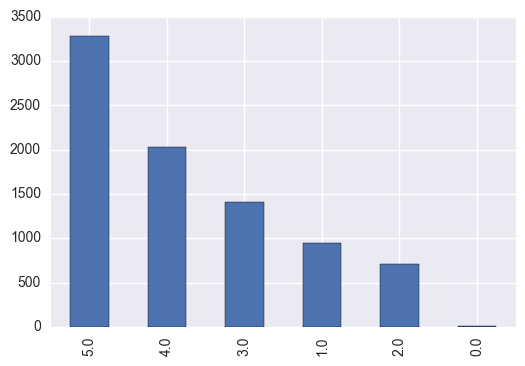

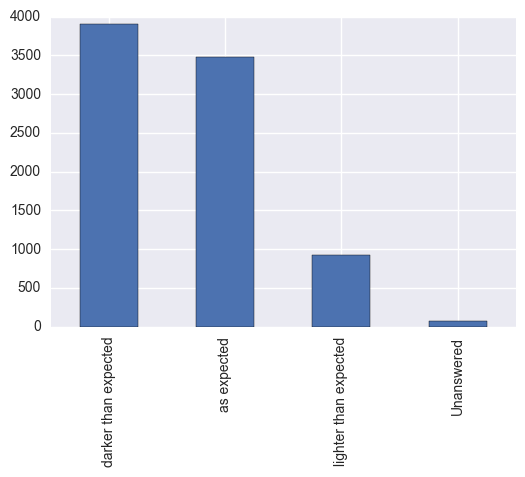

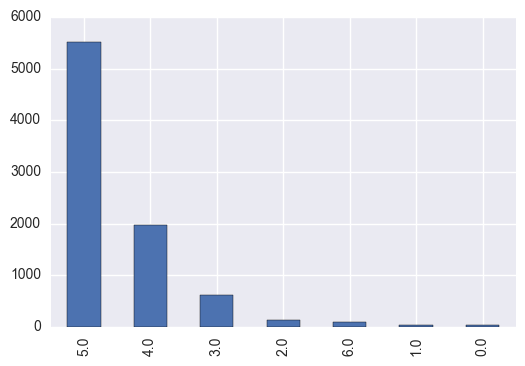

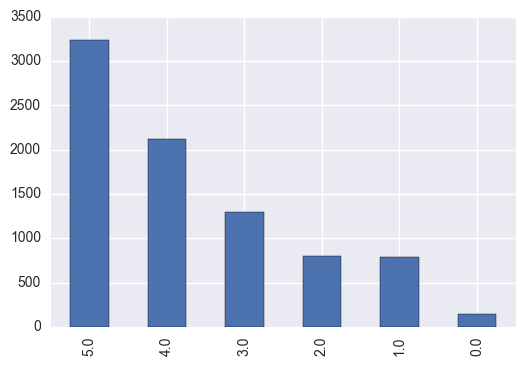

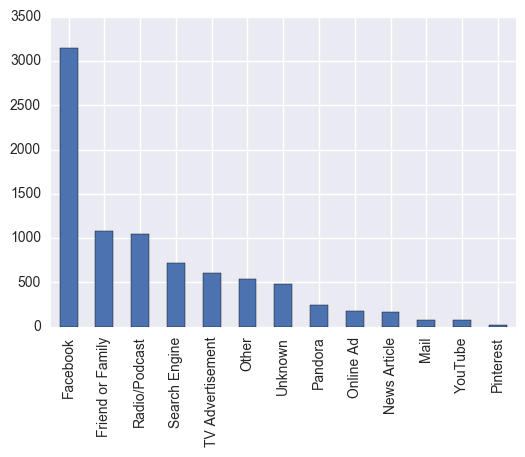

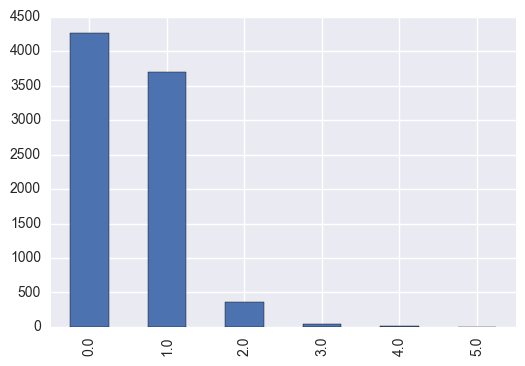

In [66]:
survey_results.fillna(0,inplace=True)

survey_results['Survey Results Rating'].value_counts().plot(kind='bar')
plt.show()

survey_results['Survey Results Lighter Darker'].value_counts().plot(kind='bar')
plt.show()

survey_results['Survey Results How Easy'].value_counts().plot(kind='bar')
plt.show()

survey_results['Survey Results Expectation'].value_counts().plot(kind='bar')
plt.show()

survey_results['Survey Results Heard From Where'].value_counts().plot(kind='bar')
plt.show()

survey_results['User Sub Facts Active Subs'].value_counts().plot(kind='bar')
plt.show()

In [67]:
survey_results_d = pd.get_dummies(data=survey_results, columns=['Survey Results Get Contacted','Survey Results Lighter Darker','Survey Results Heard From Where','User Sub Facts Categories Actively Subscribed'])

survey_results_d.head()

survey_results_d[['Survey Results Lighter Darker_Unanswered','Survey Results Lighter Darker_as expected','Survey Results Lighter Darker_darker than expected','Survey Results Lighter Darker_lighter than expected']].mean(axis=0)

Survey Results Lighter Darker_Unanswered               0.008585
Survey Results Lighter Darker_as expected              0.415524
Survey Results Lighter Darker_darker than expected     0.465125
Survey Results Lighter Darker_lighter than expected    0.110767
dtype: float64

# Now we will look at the Disposition Data

In [68]:
disposition = pd.read_csv('/Users/keatoncarano/Desktop/dsi-sf-7-materials-Keaton/Capstone/sub_disposition.csv')
disposition.head()

,Mr User User ID,User Order Facts First Order Type,Subscription Dispositions Disposition Date,Subscription Dispositions Reason,Subscription Dispositions Comment,Mr Subscription Item Name,Mr Subscription Item Product Code
0,487321,one-time,2017-07-26,3PL return,3PL return 06 - Refused,Veneto Light Brown - 7NVA,7NVA
1,1085083,subscription,2017-07-26,Too much product on hand,"Don't need any more right now, haven't used la...",Pescara Black - 2NNA,2NNA
2,1220804,subscription,2017-07-26,Color Issue - Gray Coverage,Didn't cover grays,Pisa Blonde - 9NA,9NA
3,1092304,subscription,2017-07-26,Too much product on hand,"Don't need any more right now, haven't used la...",Ravenna Brown - 3.5NNN,3.5NNN
4,545847,one-time,2017-07-26,Didn't reply / Wouldn't say,Didn't reply / Wouldn't say,Firenze Brown - 6NMG,6NMG


(array([ 2.,  0.,  0.,  1.,  3.,  0.,  4.,  4.,  2.,  0.,  4.,  0.,  3.,
         1.,  1.,  1.,  2.,  3.,  2.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,
         1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.

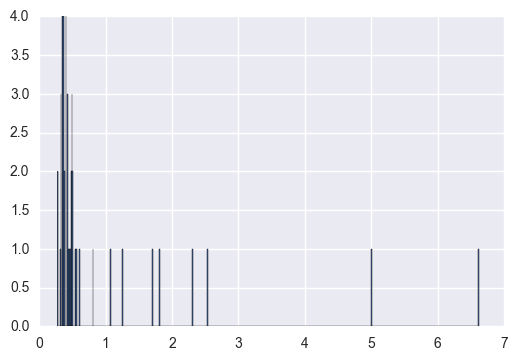

In [69]:
prd_sub_cancel = disposition['Mr Subscription Item Product Code'].value_counts().to_dict()
prd_orders = first_order_raw['Mr Order Items Product Code'].value_counts().to_dict()
ordered_caned = pd.DataFrame.from_dict([prd_sub_cancel,prd_orders])
ordered_caned.dropna(axis=1,inplace=True)


In [70]:
disposition.drop(['User Order Facts First Order Type','Subscription Dispositions Disposition Date','Subscription Dispositions Comment'\
                 ,'Mr Subscription Item Name'],axis=1,inplace=True)

In [71]:
disposition.head()

,Mr User User ID,Subscription Dispositions Reason,Mr Subscription Item Product Code
0,487321,3PL return,7NVA
1,1085083,Too much product on hand,2NNA
2,1220804,Color Issue - Gray Coverage,9NA
3,1092304,Too much product on hand,3.5NNN
4,545847,Didn't reply / Wouldn't say,6NMG


In [72]:
disposition['Subscription Dispositions Reason'].value_counts()

Auto-delivery - Prefer one-time            14504
Too much product on hand                   12712
Color Issue - Color Match                   8805
Color Issue - Gray Coverage                 5108
Price                                       4558
Color Issue - Color faded                   3877
3PL return                                  1931
Duplicate Subscription                      1067
Auto-delivery - Other                        830
Going back to the salon                      792
Sensitivity                                  655
Checkout Process                             494
Didn't reply / Wouldn't say                  486
Going gray                                   429
Shipping - Where's my order?                 322
Duplicate order                              132
Not the right product                        131
Wasn't satisfied with color                   96
Returned                                      72
Accidental, incorrect                         58
Change to shipping m

In [73]:
disposition = pd.get_dummies(data=disposition, columns=['Subscription Dispositions Reason'])

# Now Lets Look at Email Events

In [74]:
email = pd.read_csv('/Users/keatoncarano/Desktop/dsi-sf-7-materials-Keaton/Capstone/email_event_info.csv')
email.head()

/Users/keatoncarano/anaconda/envs/dsi/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (0,1) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,User Order Facts First Order Date,User Order Facts First Order Type,Mr User User ID,User Email Facts Days Since Last Clicked,User Email Facts Days Since Last Engaged,User Email Facts Days Since Last Opened,User Email Facts Email Opens,User Email Facts Emails Clicked,User Email Facts Emails Sent
0,NaN,NaN,599641.0,NaN,181 or Above,421.0,55,0,116
1,NaN,NaN,416168.0,NaN,181 or Above,258.0,1,0,162
2,NaN,NaN,1214942.0,NaN,31 to 60,34.0,1,0,8
3,NaN,NaN,1163594.0,NaN,Undefined,NaN,0,0,9
4,NaN,NaN,490617.0,NaN,Undefined,NaN,0,0,25


In [161]:
# make sure to unhash below if first run through 

email['Email_Open_Rate'] = email['User Email Facts Email Opens']/ email['User Email Facts Emails Sent']
email['Email_CTR'] = email['User Email Facts Days Since Last Clicked']/email['User Email Facts Email Opens']
#email.drop(['User Order Facts First Order Date','User Order Facts First Order Type'],axis=1 ,inplace=True)
email.fillna(0,inplace=True)
#email = pd.get_dummies(data=email, columns=['User Email Facts Days Since Last Engaged'])
email.head()

,Mr User User ID,User Email Facts Days Since Last Clicked,User Email Facts Days Since Last Opened,User Email Facts Email Opens,User Email Facts Emails Clicked,User Email Facts Emails Sent,Email_Open_Rate,Email_CTR,User Email Facts Days Since Last Engaged_0 to 30,User Email Facts Days Since Last Engaged_181 or Above,User Email Facts Days Since Last Engaged_31 to 60,User Email Facts Days Since Last Engaged_61 to 90,User Email Facts Days Since Last Engaged_91 to 180,User Email Facts Days Since Last Engaged_Undefined
0,599641.0,0.0,421.0,55,0,116,0.474138,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,416168.0,0.0,258.0,1,0,162,0.006173,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,1214942.0,0.0,34.0,1,0,8,0.125000,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1163594.0,0.0,0.0,0,0,9,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,490617.0,0.0,0.0,0,0,25,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0


# NPS Results

In [76]:
nps = pd.read_csv('/Users/keatoncarano/Desktop/dsi-sf-7-materials-Keaton/Capstone/NPS_by_user.csv')
nps.head()

,Order Level Advisor Color Differntial,Mr User User ID,Order Nps Nps,Order Nps Nps Response Count
0,0,975744,NaN,0
1,0,1088251,NaN,0
2,-1,908096,NaN,0
3,0,966141,NaN,0
4,0,1165311,NaN,0


In [77]:
nps['Order Nps Nps'].value_counts()
nps.shape

(79013, 4)

In [78]:
nps.isnull().sum()

Order Level Advisor Color Differntial        0
Mr User User ID                              0
Order Nps Nps                            71352
Order Nps Nps Response Count                 0
dtype: int64

In [79]:
new_colnames = [x.lower().replace(')','').replace('(','').replace(' ','_') for x in joined.columns]
joined.columns = new_colnames

In [80]:
joined.head()

,mr_user_user_id_x,products_purchased,mr_order_order_id,user_order_facts_lifetime_orders,num_items_purchased,purchased_accessory_kit,user_order_facts_first_order_type_subscription,mr_user_age_tier_18_to_24,mr_user_age_tier_25_to_34,mr_user_age_tier_35_to_44,...,bought_top_8_rec,bought_rec_1,bought_rec_2,bought_rec_3,bought_rec_4,bought_rec_5,bought_rec_6,bought_rec_7,bought_rec_8,one_time_buyer
0,2796.0,[9NGV],100900090,1,1,0,0.0,0.0,0.0,0.0,...,True,False,False,True,False,False,False,False,False,1
3,26990.0,[5NRM],100838508,2,1,0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,0
8,76208.0,"[CRG7GM, 6NMG]",100841416,2,2,0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,0
9,86140.0,"[5NGV, 41000]",101084661,11,2,1,1.0,0.0,0.0,0.0,...,True,False,False,True,False,False,False,False,False,0
13,132208.0,"[2NAA, 41000, cclegno]",100928525,9,3,1,1.0,0.0,0.0,0.0,...,True,False,False,True,False,False,False,False,False,0


In [151]:
joined.shape

(65585, 127)

# Visits before Purchase

In [127]:
visits_pre_purchase = pd.read_csv('/Users/keatoncarano/Desktop/dsi-sf-7-materials-Keaton/Capstone/visits_before_first_purchase.csv')
visits_pre_purchase.head()

,Mr User User ID,User Visit Facts Session Index of First Order,User Visit Facts First Order Source
0,1862.0,9,NaN
1,2796.0,2,(direct)
2,3558.0,17,bronto
3,7880.0,1,bing
4,26990.0,2,facebook


In [128]:
'facebook'.split('.')

['facebook']

In [129]:
def standardize_source(source):
    source = source.lower()
    source_lis = source.split('.')
    if len(source_lis) > 1:
        source = source_lis[1]
    return source

In [146]:
visits_pre_purchase['User Visit Facts First Order Source'].fillna('unknown', inplace= True)

# social media sites referral
# popular visit sites 
visits_pre_purchase["User Visit Facts First Order Source"] = visits_pre_purchase['User Visit Facts First Order Source'].apply(standardize_source)




In [147]:
# categorized_sources = ['facebook','pinterest','instagram','google','bing','yahoo','madison-reed', '(direct)','bronto','iterable','affiliate','ambassador','conversant','extole','zendesk', 'shareasale','inboxdollars'\
#                       'pandora','youtube','amazon']

# all_sources = visits_pre_purchase['User Visit Facts First Order Source'].unique()
# all_sources= list(all_sources)

# categorized_sources= set(categorized_sources)
# all_sources = set(all_sources)

# other = all_sources.difference(categorized_sources)
# other

In [144]:
def cat_channel(chan):
    if chan in ['facebook','pinterest','instagram']:
        return 'Social Media'
    elif chan in ['google','bing','yahoo']:
        return 'Search'
    elif chan in['madison-reed', '(direct)']:
        return 'Direct'
    elif chan in ['bronto','iterable','affiliate','ambassador','conversant','extole','zendesk', 'shareasale','inboxdollars']:
        return 'Email_Partner'
    elif chan in  ['pandora','youtube']:
        return 'Entertainment'
    elif chan in ['amazon']:
        return 'Consumer'
    else:
        return 'other'

visits_pre_purchase["User Visit Facts First Order Source"] = visits_pre_purchase['User Visit Facts First Order Source'].apply(cat_channel)


In [162]:
visits_pre_purchase = pd.get_dummies(data=visits_pre_purchase, columns=['User Visit Facts First Order Source'])


In [154]:
visits_pre_purchase.head()

,Mr User User ID,User Visit Facts Session Index of First Order,User Visit Facts First Order Source_Consumer,User Visit Facts First Order Source_Direct,User Visit Facts First Order Source_Email_Partner,User Visit Facts First Order Source_Entertainment,User Visit Facts First Order Source_Search,User Visit Facts First Order Source_Social Media,User Visit Facts First Order Source_other
0,1862.0,9,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2796.0,2,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,3558.0,17,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,7880.0,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,26990.0,2,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [156]:
joined = joined.merge(visits_pre_purchase, how='left', left_on='mr_user_user_id_x', right_on='Mr User User ID')

In [157]:
joined.shape

(67467, 152)

# Days Since Last Purchase

In [164]:
days_since_last_purchase = pd.read_csv('/Users/keatoncarano/Desktop/dsi-sf-7-materials-Keaton/Capstone/days_since_last_purchase.csv')
days_since_last_purchase.head()


,Mr User User ID,User Order Facts Days Since Purchase
0,1862.0,806
1,1914.0,1295
2,2796.0,449
3,2846.0,4
4,2961.0,22


In [165]:
joined= joined.merge(days_since_last_purchase, how='left',left_on='mr_user_user_id_x', right_on='Mr User User ID')

In [167]:
joined.shape

(67467, 154)

In [168]:
new_colnames = [x.lower().replace(')','').replace('(','').replace(' ','_') for x in joined.columns]
joined.columns = new_colnames

# Now we will Merge the Joined Dataset with Email, Site Event, Email, and Days Since Last Visit Data

Note that we will initally be leaving NPS and Post Purchase Survey Data out of the initial model. NPS only has information on 10 % of User IDs while the Post Purchase Survey may Require us to do some KNN Imputation down the line.

Additionally the Disposition Data will be used in the second phase of the project when we attempt to predict why as User is likely to churn. 

In [175]:
joined = joined.merge(email, how='left', left_on='mr_user_user_id_x', right_on='Mr User User ID')

In [179]:
joined.dtypes

mr_user_user_id_x                                        float64
products_purchased                                        object
mr_order_order_id                                          int64
user_order_facts_lifetime_orders                           int64
num_items_purchased                                        int64
purchased_accessory_kit                                    int64
user_order_facts_first_order_type_subscription           float64
mr_user_age_tier_18_to_24                                float64
mr_user_age_tier_25_to_34                                float64
mr_user_age_tier_35_to_44                                float64
mr_user_age_tier_45_to_54                                float64
mr_user_age_tier_55_to_64                                float64
mr_user_age_tier_65_or_above                             float64
mr_user_age_tier_undefined                               float64
quiz_responses_color_differntial                         float64
quiz_responses_color_freq

In [711]:
joined_cleaned = joined.drop(['event_facts_recommendation_1','event_facts_recommendation_2','event_facts_recommendation_3',
                             'event_facts_recommendation_4','event_facts_recommendation_5','event_facts_recommendation_6',
                             'event_facts_recommendation_7','event_facts_recommendation_8','mr_user_user_id_y','mr_user_user_id_y',
                              'user_order_facts_first_order_type'
                             ],axis=1)

In [712]:
joined_cleaned.drop(['mr_user_user_id_x'],inplace=True, axis=1)

/Users/keatoncarano/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [713]:
bool_cols = joined_bool.columns

In [714]:
joined_cleaned[bool_cols]=joined_cleaned[bool_cols].applymap(lambda x: 1 if x else 0)

In [715]:
joined_cleaned[['email_open_rate','email_ctr']]=joined_cleaned[['email_open_rate','email_ctr']].applymap(lambda x: 0 if x == np.inf else x )

In [716]:
joined_cleaned['email_open_rate'].max()

3.0

In [480]:
# make dummy variables for each product purchased. if that item is purchased then it gets a value of 1. 
# this will hopefully allow us to see if there are products purchased with certain hair color
# skine tone ect combos that lead to making only one purchase
unique_products = quiz_by_order['Mr Order Items Product Code'].unique()

In [685]:
unique_products = [x.replace('$','') for x in unique_products]
unique_products = list(set(unique_products))
from sklearn.feature_extraction.text import CountVectorizer

In [717]:
joined_cleaned.products_purchased

0                                             [9NGV]
1                                             [5NRM]
2                                     [CRG7GM, 6NMG]
3                                      [5NGV, 41000]
4                             [2NAA, 41000, cclegno]
5                            [ccterra, CRG0C0, 5NRM]
6                                             [3NNA]
7                              [CRG8VA, 9NA, CRG0C0]
8                                      [5NGM, $5NGM]
9                                             [7NGV]
10                                          [4.5NNN]
11                                  [ccsabbia, 7NGM]
12                                     [3NNA, $3NNA]
13                                    [7NCR, CRG7CR]
14                                   [ccterra, 6NMG]
15                                           [10NVA]
16                                           [10NGV]
17                                            [6NCG]
18                                            

In [718]:
joined_cleaned.products_purchased = joined_cleaned.products_purchased.apply(lambda x: ",".join(x))


In [721]:
cvec = CountVectorizer(ngram_range= (1,1), stop_words=None)

product_matrix = cvec.fit_transform(joined_cleaned.products_purchased).toarray()






In [725]:
prod_mat = pd.DataFrame(product_matrix, columns=cvec.get_feature_names())
prod_mat.shape

(67467, 75)

In [726]:
joined_cleaned = pd.concat([joined_cleaned, prod_mat],axis=1)

In [727]:
joined_cleaned.shape

(67467, 217)

In [ ]:
# def pp_checker(prods):
#     pp_list = []
    
#     for p in prods:
#         pl = []
#         pi = []
#         for ix,_ in enumerate(unique_products):
#             if p ==  unique_products[ix]:
#                 pi.append(1)
#             else:
#                 pi.append(0)
#             [pl + pi for pl, pi in zip(pl, pi)]


#         pp_list.append(pl)
        

        
#     return pp_list
    
    

# sample = joined.products_purchased.apply(pp_checker)
# sample.shape

# pd.DataFrame(sample)

,0,1,2,3,4,5,6,7,8,9,...,67457,67458,67459,67460,67461,67462,67463,67464,67465,67466
0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",...,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."


In [535]:
for up in unique_products:
    for i in joined.shape[0]:
        joined.ix[i,up] = 

In [566]:
pp_df.columns = unique_products

In [728]:
nps = nps.dropna()
survey_results = survey_results.dropna()

nps_users = nps['Mr User User ID'].tolist()
survey_users = survey_results['Mr User User ID'].tolist()

joined_cleaned['nps_taken'] = joined_cleaned['mr_user_user_id'].isin(nps_users)
joined_cleaned['post_purchase_survey_taken'] = joined_cleaned['mr_user_user_id'].isin(survey_users)

In [729]:
joined_cleaned.post_purchase_survey_taken.mean()

0.020765707679309884

# Drop non Dummified Quantity Vaiables

In [281]:
#joined.drop(['Mr Order Order ID','Mr Order Items Product Code_x','Event Facts Recommendation 1','Event Facts Recommendation 2','Event Facts Recommendation 3','Event Facts Recommendation 4','Event Facts Recommendation 5','Event Facts Recommendation 6','Event Facts Recommendation 7','Event Facts Recommendation 8'],axis=1, inplace=True)

In [730]:
X_raw = joined_cleaned.drop(['user_order_facts_first_order_date','products_purchased','mr_order_order_id','mr_user_user_id','user_order_facts_lifetime_orders','one_time_buyer','user_order_facts_days_since_purchase'],axis=1)



In [765]:
joined_cleaned.to_csv('cleaned_data_no_nps_surv_pp',index=False)

In [766]:
pd.read_csv('./cleaned_data_no_nps_surv_pp')

,products_purchased,mr_order_order_id,user_order_facts_lifetime_orders,num_items_purchased,purchased_accessory_kit,user_order_facts_first_order_type_subscription,mr_user_age_tier_18_to_24,mr_user_age_tier_25_to_34,mr_user_age_tier_35_to_44,mr_user_age_tier_45_to_54,...,crg0c0,crg6g0,crg6na,crg7cg,crg7cr,crg7gm,crg8gv,crg8va,nps_taken,post_purchase_survey_taken
0,9NGV,100900090,1,1,0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,False,False
1,5NRM,100838508,2,1,0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,False,False
2,"CRG7GM,6NMG",100841416,2,2,0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,1,0,0,False,False
3,"5NGV,41000",101084661,11,2,1,1.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,False,False
4,"2NAA,41000,cclegno",100928525,9,3,1,1.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,False,False
5,"ccterra,CRG0C0,5NRM",100836792,3,3,0,0.0,0.0,0.0,0.0,0.0,...,1,0,0,0,0,0,0,0,False,False
6,3NNA,100898843,1,1,0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,False,False
7,"CRG8VA,9NA,CRG0C0",100845267,2,3,0,0.0,0.0,0.0,0.0,0.0,...,1,0,0,0,0,0,0,1,False,False
8,"5NGM,$5NGM",100822075,1,2,0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,False,False
9,7NGV,100932584,1,1,0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,False,False


In [732]:
X_raw.isnull().sum()

num_items_purchased                               0
purchased_accessory_kit                           0
user_order_facts_first_order_type_subscription    0
mr_user_age_tier_18_to_24                         0
mr_user_age_tier_25_to_34                         0
mr_user_age_tier_35_to_44                         0
mr_user_age_tier_45_to_54                         0
mr_user_age_tier_55_to_64                         0
mr_user_age_tier_65_or_above                      0
mr_user_age_tier_undefined                        0
quiz_responses_color_differntial                  0
quiz_responses_color_frequency                    0
quiz_responses_natural_hair_level                 0
quiz_responses_treated_hair_level                 0
quiz_responses_hair_tone_0                        0
quiz_responses_hair_tone_ash                      0
quiz_responses_hair_tone_copper                   0
quiz_responses_hair_tone_gold                     0
quiz_responses_hair_tone_mahogany                 0
quiz_respons

# Regressions and Modeling

In [733]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

In [734]:
X_raw.fillna(0,inplace=True)

In [735]:
ss = StandardScaler()
X = ss.fit_transform(X_raw)

In [736]:
y = joined_cleaned.one_time_buyer

In [737]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2, random_state=42)

In [738]:
logit = LogisticRegression(penalty='l2')
logit.fit(X_test,y_test)
ypred = logit.predict(X_test)

In [739]:
print classification_report(ypred,y_test)
print confusion_matrix(ypred, y_test)

             precision    recall  f1-score   support

          0       0.84      0.84      0.84      8207
          1       0.75      0.76      0.75      5287

avg / total       0.81      0.81      0.81     13494

[[6860 1347]
 [1281 4006]]


In [740]:
print zip(X_raw.columns, logit.coef_)

[('num_items_purchased', array([  1.14231479e-02,  -4.03419185e-02,  -9.38297345e-01,
         1.67532885e-02,  -9.54336338e-03,  -2.41947727e-03,
        -6.81304410e-02,  -1.12623575e-01,   1.62203597e-03,
         9.95231488e-02,   9.93630937e-02,   1.71306632e-01,
         2.36968301e-01,  -1.98949912e-01,   9.67127336e-02,
        -5.10767410e-02,   2.11952377e-02,  -2.08399060e-02,
        -2.09668959e-02,  -3.14580237e-02,  -1.55967755e-01,
        -4.14348093e-02,   2.46589468e-02,   2.09945224e-02,
        -5.05740361e-03,   5.60156773e-01,  -2.04043658e-01,
        -3.07967128e-01,  -1.55371627e-01,  -2.37124042e-01,
        -1.57921585e-01,  -5.14009393e-02,   7.38045444e-02,
         1.91756219e-01,   8.34987633e-02,  -1.07324627e-01,
         3.54163808e-01,  -2.17458436e-01,  -7.80933239e-02,
        -1.29399190e-01,  -1.86423334e-01,   0.00000000e+00,
         5.47290269e-02,   6.74654514e-02,   6.89119161e-02,
         2.92595643e-01,  -3.27413043e-02,  -1.22382011e-01,

In [741]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [742]:
rf = RandomForestClassifier(n_estimators= 200,  n_jobs = -1,random_state =50, max_features = "auto")
scores_rf = cross_val_score(rf, X, y, cv=25, n_jobs=-1)
scores_rf

array([ 0.78658763,  0.82845498,  0.83327158,  0.83512412,  0.8340126 ,
        0.83586514,  0.82289737,  0.81808077,  0.83178955,  0.83697666,
        0.81030011,  0.8095591 ,  0.82808448,  0.80326047,  0.81289366,
        0.80733605,  0.81104113,  0.7902927 ,  0.81801334,  0.80800593,
        0.81727205,  0.79614529,  0.76130467,  0.77168273,  0.71709307])

In [743]:
scores_rf.mean()

0.80901380674546919

In [653]:
# Best params alredy selected. Do not  Run Unless Necessary
from sklearn.model_selection import GridSearchCV


In [654]:
params = dict(n_estimators = [200,1000, 2000],
             max_depth = [None, 4, 8, 16, 32],
             min_samples_split = [2,4,8,12]
            )
#rf1 = RandomForestClassifier(n_jobs=-1, max_features='auto', random_state=69)

In [ ]:
#gs = GridSearchCV(rf1, params, scoring='precision')

In [ ]:
gs.fit(X_train, y_train)

In [ ]:
gs.best_score_

In [ ]:
gs.best_params_

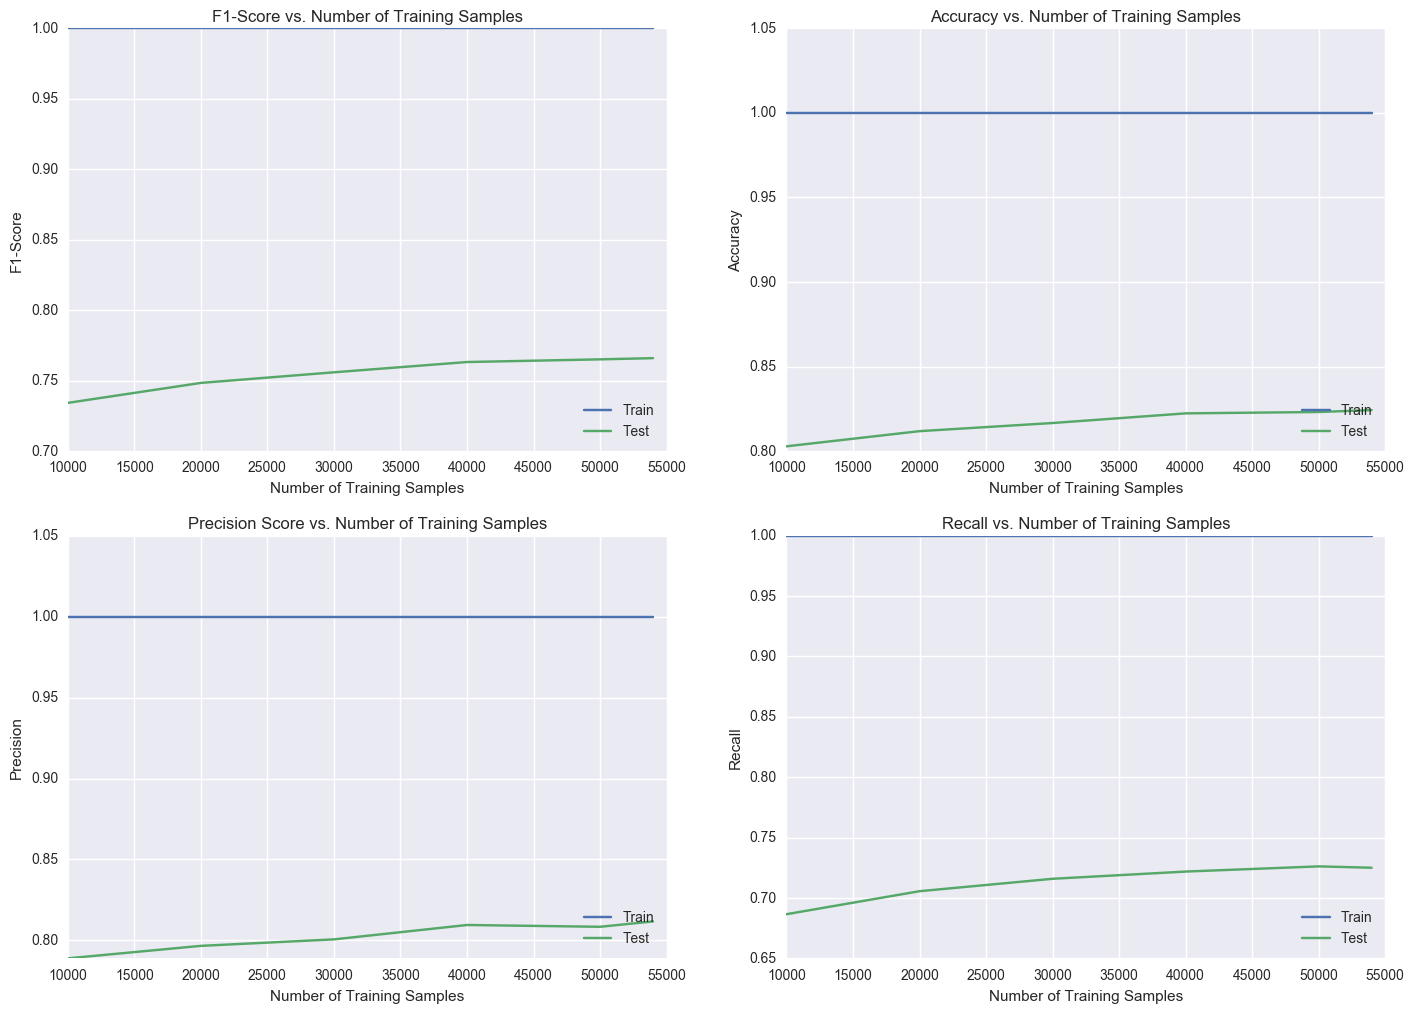

In [744]:
start = time()
rfc = RandomForestClassifier(max_depth= None, min_samples_split= 2, n_estimators= 2000, n_jobs=-1)

cv_rfc = cross_validation(rfc, 
                          X_train, 
                          y_train , 
                          n_splits=10,
                          init_chunk_size = 10000, 
                          chunk_spacings = 10000, 
                          average = "binary")

cv_rfc.validate_for_holdout_set(X_test, y_test)
cv_rfc.plot_learning_curve()







end = time()
total_time = end - start

In [745]:
total_time

260.8026931285858

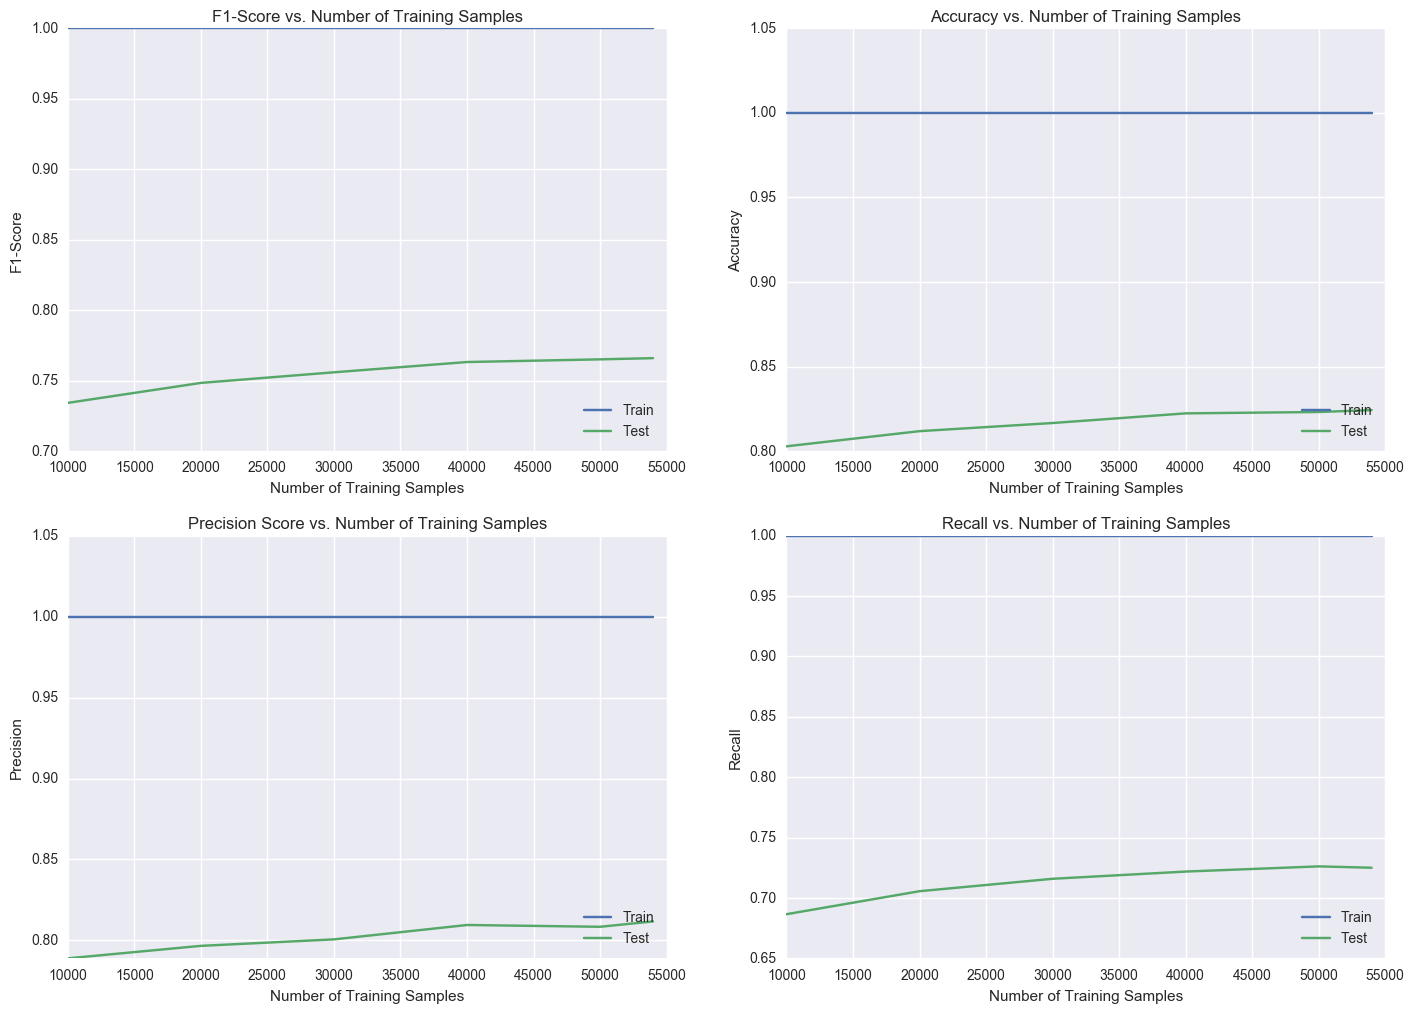

In [746]:
cv_rfc.plot_learning_curve()

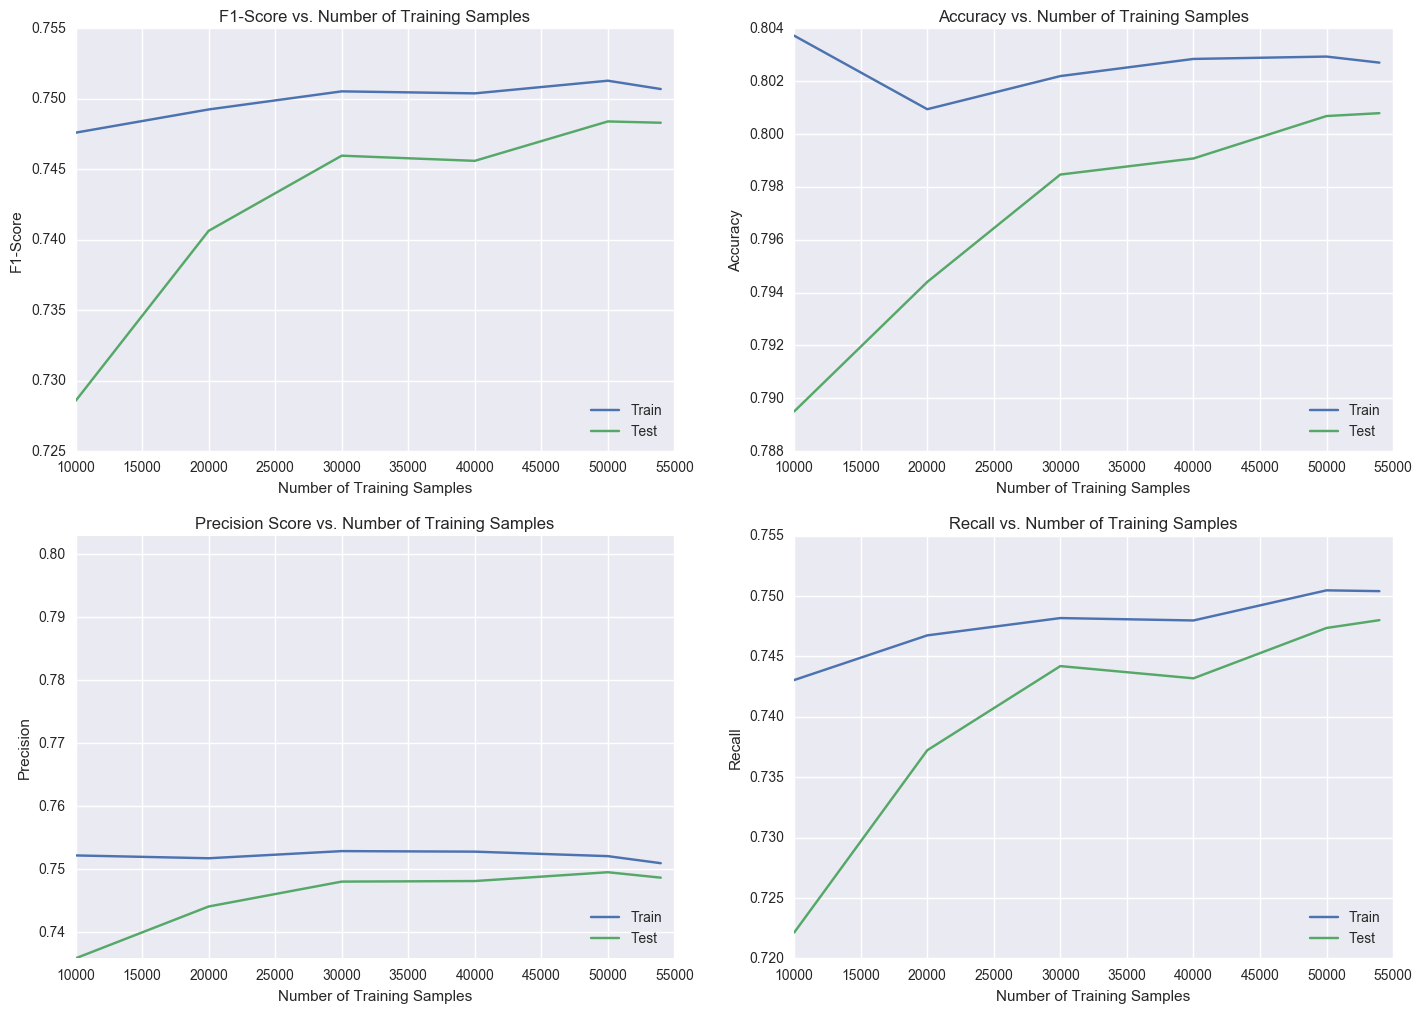

In [747]:
start = time()

lr = LogisticRegression(penalty='l2')
cvlog = cross_validation(lr, 
                      X_train, 
                      y_train.values,
                      n_splits=10,
                      init_chunk_size = 10000, 
                      chunk_spacings = 10000, 
                      average = "binary")

cvlog.train_for_learning_curve()
cvlog.plot_learning_curve()
end = time()
total_time_log = end - start

In [748]:
total_time_log

676.958386182785

In [749]:
from sklearn.cluster import KMeans

In [750]:
kmean = KMeans()

In [751]:
kmean.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [752]:
kmean.transform(X)

array([[ 13.71293186,  13.15977555,  14.95074568, ...,  12.66740388,
         15.21976155,  44.33065872],
       [ 12.12212404,  13.4685401 ,  13.30926344, ...,  10.54870816,
         13.20765686,  43.31695925],
       [ 18.10292553,  18.73053594,  18.89387106, ...,  17.90105962,
         18.99622013,  45.67007934],
       ..., 
       [ 14.99160251,  15.23354571,  14.76111984, ...,  15.95597806,
         16.05887114,  45.11489981],
       [ 12.42320538,  12.37587754,  10.52645471, ...,  13.69617296,
         13.63035655,  44.26670787],
       [ 14.02704788,  14.44854887,  14.77933362, ...,  14.55761843,
         15.0517512 ,  44.54008203]])

In [753]:
clusters = kmean.predict(X)

(array([ 10891.,   9940.,   5155.,  10691.,  18135.,   6770.,   5769.,
           116.]),
 array([ 0.   ,  0.875,  1.75 ,  2.625,  3.5  ,  4.375,  5.25 ,  6.125,  7.   ]),
 <a list of 8 Patch objects>)

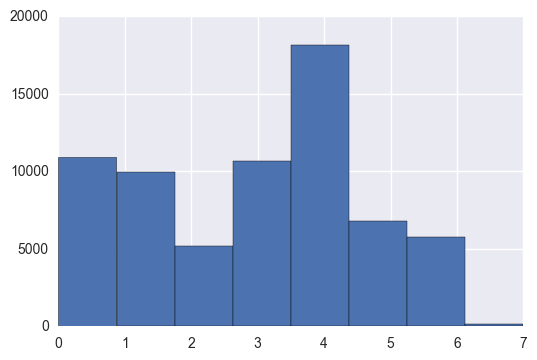

In [754]:
from sklearn.cross_validation import KFold
plt.hist(clusters, bins=8)

In [755]:
from sklearn.ensemble import ExtraTreesClassifier

In [756]:
etc = ExtraTreesClassifier()
etc.fit(X_train,y_train)
y_pred_etc = etc.predict(X_test)
print etc.score(X_test, y_test)
print etc.feature_importances_

0.792500370535
[  9.90835320e-03   4.05686655e-03   1.04928758e-01   1.15883307e-05
   1.21910132e-04   2.68518494e-04   4.22699654e-04   6.62064733e-04
   9.17071672e-05   1.94365471e-03   7.89120944e-03   1.43414118e-02
   1.03696929e-02   1.42610627e-02   4.66592281e-03   5.98087340e-03
   3.96388882e-03   8.41437180e-03   6.13024173e-03   2.93204651e-03
   3.44261908e-05   2.29353861e-03   3.02812366e-03   4.05207161e-03
   2.59612469e-03   6.83970720e-03   3.04516197e-03   7.17516256e-03
   2.24136518e-03   4.10572896e-03   4.24349958e-05   2.65600156e-03
   1.42808251e-03   9.54422962e-05   3.69405806e-03   2.33982433e-03
   1.30893537e-02   1.12597515e-02   5.31140380e-03   5.94775029e-03
   5.53322413e-03   0.00000000e+00   5.26551204e-03   6.02112682e-03
   6.83285882e-03   4.37901600e-03   3.33847156e-03   8.22915650e-03
   6.31706176e-03   2.66371107e-03   1.60434757e-06   2.68605598e-03
   3.74686875e-03   9.39559770e-03   6.45833495e-03   9.70904239e-03
   1.86314939e-03  

In [757]:
from sklearn.ensemble import GradientBoostingClassifier

In [758]:
gbt = GradientBoostingClassifier()
gbt.fit_transform(X_train, y_train)

/Users/keatoncarano/anaconda/envs/dsi/lib/python2.7/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


array([[-0.77114392,  0.14466482, -0.27106715, ..., -0.16565724,
        -0.02902455,  2.3803447 ],
       [ 1.29677479,  0.14466482, -0.27106715, ..., -0.16565724,
        -0.35747131, -0.42010722],
       [-0.77114392,  0.14466482,  2.50687017, ..., -0.16565724,
        -0.35747131, -0.42010722],
       ..., 
       [-0.77114392,  0.14466482,  0.65491196, ..., -0.16565724,
        -0.02902455, -0.42010722],
       [-0.77114392,  0.14466482, -0.27106715, ..., -0.16565724,
        -0.35747131, -0.42010722],
       [ 1.29677479,  0.14466482, -0.27106715, ..., -0.16565724,
        -0.35747131, -0.42010722]])

In [759]:
print gbt.score(X_test, y_test)
print type(gbt.feature_importances_)
print type(logit.coef_)

0.817622647102
<type 'numpy.ndarray'>
<type 'numpy.ndarray'>


In [767]:
gbt_params = {'max_depth': [10,12,16,20],
              'min_samples_split': [20,100,500,1000],
              'max_leaf_nodes': [10, 50 ,100],
              'max_features':['sqrt',None],
              "learning_rate" : [0.05, 0.1]}

SyntaxError: invalid syntax (<ipython-input-767-982dff0286a5>, line 5)

In [ ]:
start = time()
gs_gb = GridSearchCV( gbt, gbt_params, scoring="precision", n_jobs=-1, cv=8)
gs_gb.fit(X_train, y_train)
end = time()
print (end - start)

In [374]:
print gs_gb.best_params_
print gs_gb.best_score_

{'min_samples_split': 6, 'max_leaf_nodes': 12, 'learning_rate': 0.1, 'max_depth': 10}
0.881769972954


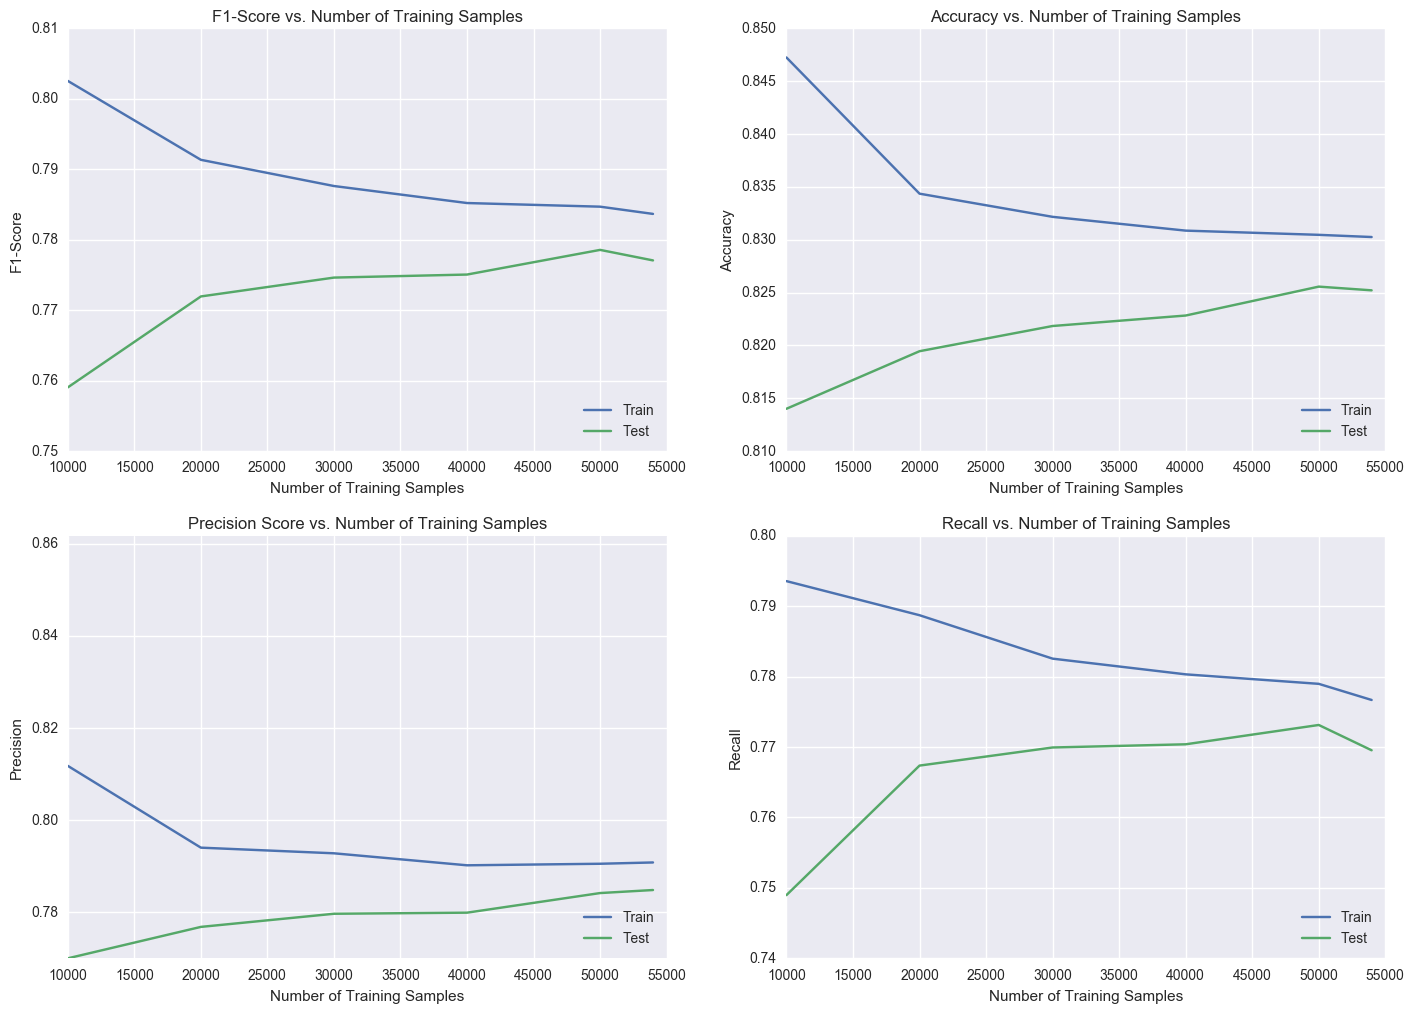

In [760]:
gbt_best = GradientBoostingClassifier(min_samples_split=6, max_leaf_nodes=12, learning_rate=0.1, max_depth= 12)

start = time()

cvlog = cross_validation(gbt_best, 
                      X_train, 
                      y_train.values,
                      n_splits=10,
                      init_chunk_size = 10000, 
                      chunk_spacings = 10000, 
                      average = "binary")

cvlog.train_for_learning_curve()
cvlog.plot_learning_curve()
end = time()
total_time_log = end - start

In [761]:
logit_coefs = logit.coef_.reshape(-1,)

In [762]:
feat_importance = pd.DataFrame(zip(X_raw.columns,gbt_best.feature_importances_,etc.feature_importances_,rfc.feature_importances_,logit_coefs ))
feat_importance.columns = ['feature','gbt','etc','rfc','logit']
feat_importance.set_index('feature')

,gbt,etc,rfc,logit
feature,,,,
num_items_purchased,0.005144,0.009908,0.009465,0.011423
purchased_accessory_kit,0.000644,0.004057,0.002887,-0.040342
user_order_facts_first_order_type_subscription,0.069912,0.104929,0.081601,-0.938297
mr_user_age_tier_18_to_24,0.000000,0.000012,0.000022,0.016753
mr_user_age_tier_25_to_34,0.000000,0.000122,0.000054,-0.009543
mr_user_age_tier_35_to_44,0.000000,0.000269,0.000149,-0.002419
mr_user_age_tier_45_to_54,0.000000,0.000423,0.000360,-0.068130
mr_user_age_tier_55_to_64,0.000000,0.000662,0.000208,-0.112624
mr_user_age_tier_65_or_above,0.000000,0.000092,0.000044,0.001622


In [763]:
print feat_importance.loc[feat_importance['gbt'].idxmax()]
print feat_importance.loc[feat_importance['etc'].idxmax()]
print feat_importance.loc[feat_importance['rfc'].idxmax()]
print feat_importance.loc[feat_importance['logit'].idxmax()]

feature    user_email_facts_emails_sent
gbt                            0.172871
etc                           0.0373106
rfc                           0.0692864
logit                          0.365339
Name: 118, dtype: object
feature    user_order_facts_first_order_type_subscription
gbt                                             0.0699124
etc                                              0.104929
rfc                                             0.0816013
logit                                           -0.938297
Name: 2, dtype: object
feature    user_order_facts_first_order_type_subscription
gbt                                             0.0699124
etc                                              0.104929
rfc                                             0.0816013
logit                                           -0.938297
Name: 2, dtype: object
feature    quiz_responses_color_resistance_0
gbt                                0.0376323
etc                               0.00683971
rfc           

On all 4 classification problems, the days since a user last ordered is the most important feature!


# Let's try and not only predict who will Churn but what their likely reason for Churning is

In [313]:
disposition_joined = joined_cleaned.merge(disposition, how='left', left_on='mr_user_user_id', right_on='Mr User User ID')
print disposition_joined.shape, disposition.shape

(70885, 175) (57179, 33)


In [316]:
disposition_joined.isnull().sum()

products_purchased                                                              0
mr_order_order_id                                                               0
user_order_facts_lifetime_orders                                                0
num_items_purchased                                                             0
purchased_accessory_kit                                                         0
user_order_facts_first_order_type_subscription                                  0
mr_user_age_tier_18_to_24                                                       0
mr_user_age_tier_25_to_34                                                       0
mr_user_age_tier_35_to_44                                                       0
mr_user_age_tier_45_to_54                                                       0
mr_user_age_tier_55_to_64                                                       0
mr_user_age_tier_65_or_above                                                    0
mr_user_age_tier

In [310]:
disposition_joined.head()

,products_purchased,mr_order_order_id,user_order_facts_lifetime_orders,num_items_purchased,purchased_accessory_kit,user_order_facts_first_order_type_subscription,mr_user_age_tier_18_to_24,mr_user_age_tier_25_to_34,mr_user_age_tier_35_to_44,mr_user_age_tier_45_to_54,...,Subscription Dispositions Reason_Price,Subscription Dispositions Reason_Returned,Subscription Dispositions Reason_Sensitivity,Subscription Dispositions Reason_Shipping - Missing component,Subscription Dispositions Reason_Shipping - Where's my order?,Subscription Dispositions Reason_Shipping - Wrong component,Subscription Dispositions Reason_Too much product on hand,Subscription Dispositions Reason_Unexpected auto delivery,Subscription Dispositions Reason_Using another product,Subscription Dispositions Reason_Wasn't satisfied with color
0,[9NGV],100900090,1,1,0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,[5NRM],100838508,2,1,0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"[CRG7GM, 6NMG]",100841416,2,2,0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"[5NGV, 41000]",101084661,11,2,1,1.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"[2NAA, 41000, cclegno]",100928525,9,3,1,1.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [311]:
X = disposition_joined.drop()

In [381]:
!pip install fancyimpute


    100% |████████████████████████████████| 307kB 2.0MB/s ta 0:00:01
    100% |████████████████████████████████| 1.5MB 539kB/s eta 0:00:01
    100% |████████████████████████████████| 92kB 6.1MB/s eta 0:00:01
    100% |████████████████████████████████| 696kB 1.1MB/s eta 0:00:01
    100% |████████████████████████████████| 61kB 7.3MB/s eta 0:00:01
    100% |████████████████████████████████| 71kB 5.9MB/s eta 0:00:01
  Running setup.py bdist_wheel for fancyimpute ... done
  Stored in directory: /Users/keatoncarano/Library/Caches/pip/wheels/46/9d/78/a49d65bb66557f705de636d1a21f9310993a4342670add3f9e
  Running setup.py bdist_wheel for knnimpute ... done
  Stored in directory: /Users/keatoncarano/Library/Caches/pip/wheels/66/a0/1c/ed41cf540d0bd6d4ae368e9554b77753da154e7d8974c4435f
  Running setup.py bdist_wheel for climate ... done
  Stored in directory: /Users/keatoncarano/Library/Caches/pip/wheels/90/1f/17/51ca46dd7c3b0be854c63468b50b3d24c443d149244cc4bb19
  Running setup.py bdist_wheel for 

In [409]:
from fancyimpute import BiScaler, KNN, NuclearNormMinimization, SoftImpute
